In [1]:
import pandas as pd
df = pd.read_excel("price_sales_data.xlsx")

# specify which features is independent or which is dependent
X = df[["Price"]]   
y = df["Sales"]


In [2]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train.shape, X_test.shape

((40, 1), (10, 1))

In [4]:
# normalization on x data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [5]:
# fit data into model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (slope): 950.6738688480522
Intercept: 111.41245125990565


In [7]:
# predict on test data
y_test_pred = model.predict(X_test_scaled)
y_test_pred

array([364.43841089, 313.92155445, 668.68054957, 634.80020979,
       538.42251318, 536.30614215, 291.02794083, 907.3335894 ,
       182.87217933, 463.24533338])

In [8]:
# see how far predicted data are to real data (mean) 
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 82.5676285156991


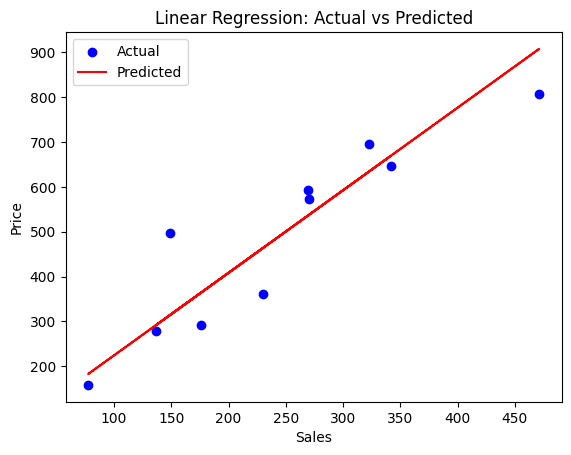

In [9]:
# plot the model prediction compared to real test data
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.xlabel("Sales")
plt.ylabel("Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


In [10]:
# predict from unseen data a user generated
import numpy as np
import pandas as pd


s = input("Enter Price: ").strip()
price_input = float(s)
X_new = pd.DataFrame({"Price": [price_input]})  # keep 2-D with the correct column name
X_new_s = scaler.transform(X_new)               # use the fitted MinMaxScaler
predicted_sales = model.predict(X_new_s)[0]     # predict Sales
print(f"Predicted Sales for Price = {price_input} is: {predicted_sales:.2f}")

Enter Price:  50000


Predicted Sales for Price = 50000.0 is: 92056.42


Predicted Sales for Price = 300.0 is: 596.48


In [ ]:
# end 